# Data Mining Process 
Goal of this lecture is to understand and implement the entire data mining process chain according to the [Cross-industry standard process (CRISP)](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) for data mining. This process chain is sketched in the picture below:  

<img src="./crispIndallnodep.png" style="width:600px" align="middle">

**Example application of this notebook:**

The `Data`-folder contains the dataset `churnPrediction.csv`. The dataset includes information about:
* Customers who left within the last month – the column is named `Churn`.
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been customers, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

The overall task is to predict churn from the other observable features 

## Prerequisities

1. The main packages applied in this notebook are: 
    * [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
    * [Scikit-Learn](http://scikit-learn.org/stable/)
    * [Matplotlib](https://matplotlib.org/)
    * [Seaborn](https://seaborn.pydata.org/)
    

---

## Tasks
### Data Access
#### Task 1: Access Data
Load the file `churnPrediction.csv`-file into a pandas dataframe by applying the pandas-method `read_csv()`. Use this method's argument `na_values` in order to define, which fields in the input file (e.g. empty strings) shall be mapped to `NaN`. Display the shape and the head of this dataframe.

In [1]:
import pandas as pd
#missing values in csv are labeled as a blank which isnt part of the default values which are intepreted as NaN
data = pd.read_csv('churnPrediction.csv',na_values=' ')
print(data.shape)
display(data.head(5))



(7042, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Task 2: Process missing values 
Check if there is missing data (`NaN`) in this file. If so, delete all rows with missing values. How many rows remain in the dataset?

In [2]:
#delete all rows containing NaN
data = data.dropna()
#reset index of dataframe, so each index is actually correct
data = data.reset_index(drop=True)
print(data.shape)
#-->7032 rows remaining



(7032, 21)


### Preprocess and Understand Data

#### Task 3: Check domains of columns
For each of the dataframe's columns display the value-range. For columns with a large value-range display only the first 5 values.

In [3]:
for col in data:
    print(col+':')
    if(data.dtypes[col] == 'object'):
        print('Unqiue values: '+str(data[col].shape[0]))
        print(data[col].unique()[:5])
    else:
        print(str(data[col].min())+' - '+str(data[col].max()))
    print("\n")

customerID:
Unqiue values: 7032
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU']


gender:
Unqiue values: 7032
['Female' 'Male']


SeniorCitizen:
0 - 1


Partner:
Unqiue values: 7032
['Yes' 'No']


Dependents:
Unqiue values: 7032
['No' 'Yes']


tenure:
1 - 72


PhoneService:
Unqiue values: 7032
['No' 'Yes']


MultipleLines:
Unqiue values: 7032
['No phone service' 'No' 'Yes']


InternetService:
Unqiue values: 7032
['DSL' 'Fiber optic' 'No']


OnlineSecurity:
Unqiue values: 7032
['No' 'Yes' 'No internet service']


OnlineBackup:
Unqiue values: 7032
['Yes' 'No' 'No internet service']


DeviceProtection:
Unqiue values: 7032
['No' 'Yes' 'No internet service']


TechSupport:
Unqiue values: 7032
['No' 'Yes' 'No internet service']


StreamingTV:
Unqiue values: 7032
['No' 'Yes' 'No internet service']


StreamingMovies:
Unqiue values: 7032
['No' 'Yes' 'No internet service']


Contract:
Unqiue values: 7032
['Month-to-month' 'One year' 'Two year']


PaperlessBilling:
Unqiue value

#### Task 4: Transformation of non-numeric data
There a many columns with non-numeric values in the dataframe. Transform them into numeric representations by applying the `LabelEncoder` from sckikit-learn. Before this transformation the column `customerID` can be removed from the dataframe.

In [4]:
#drop customerId column
data = data.drop(columns="customerID")
print(data.shape)

(7032, 20)


In [5]:
import sklearn
from copy import deepcopy
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
nonNumericColumns=[]
#copy data to keep non-numeric values
dataNonNumeric = deepcopy(data) 
for column in data:
    #check if datatype of column is numeric
    if data.dtypes[column] == object:
        #Fit label encoder
        le.fit(data[column])
        #Transform labels to normalized encoding
        values = le.transform(data[column])
        #replace original values with transformed values
        data[column] = values
        #save names of non-numeric columns
        nonNumericColumns.append(column)

#### Task 5: Understand data by calculating descriptive statistics
For pandas- dataframes simple descriptive statistics can be calculated by applying the `describe()`-method. Display the statistics returned by this method. 

In [6]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


#### Task 6: Understand data by univariate distribution visualisation - numeric variables
For the numeric features `tenure`, `MonthlyCharges` and `TotalCharges` visualize the value-distribution by applying *violinplots* from *seaborn*.

[]

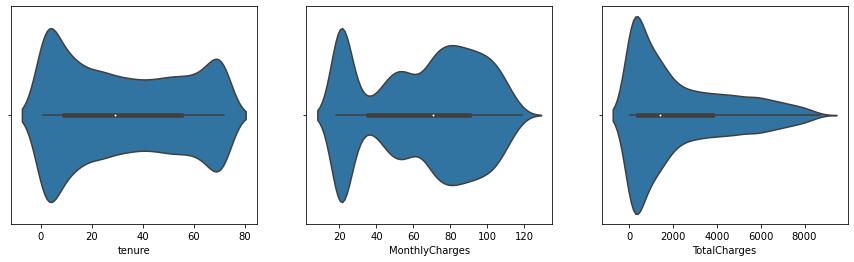

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
#surpress all warnings
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(ncols=3 ,figsize=(15,4))
sns.violinplot(data["tenure"],ax=ax[0])
sns.violinplot(data["MonthlyCharges"],ax=ax[1])
sns.violinplot(data["TotalCharges"],ax=ax[2])
plt.plot()



#### Task 7: Understand data by univariate distribution visualisation - discrete variables
For the 16 non-numeric features visualize the value-distribution by applying *countplots* from *seaborn*. The 16 countplots shall be arranged in a (4x4)-grid.

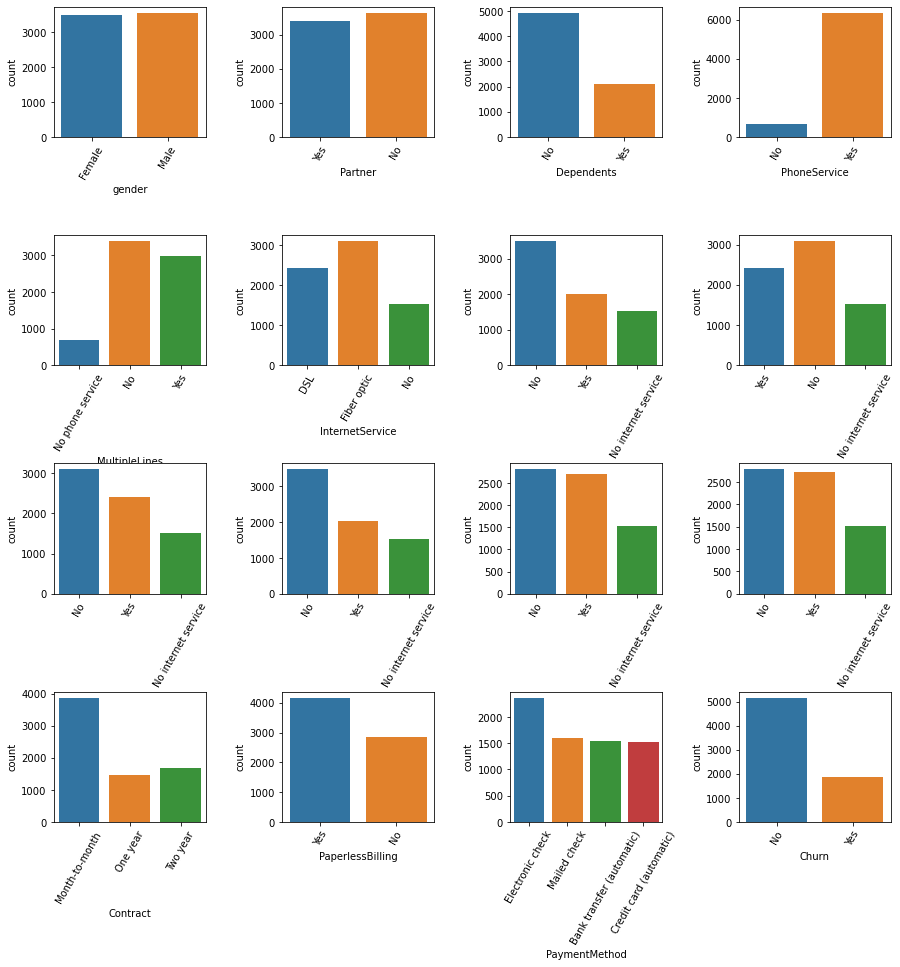

In [8]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.75, wspace=0.5)
index=0
for nonNumericColumn in nonNumericColumns:
        ax = fig.add_subplot(4, 4,index+1)
        sns.countplot(dataNonNumeric[nonNumericColumn],ax=ax)
        plt.xticks(rotation=60)
        index+=1


#### Task 8: Understand data by conditional distribution visualisation
Repeat the distribution-visualisations of the two previous tasks. However, now for each variable the distribution in class `churn=0` and in class `churn=1` shall be calculated separately. Apply seaborn's *FacetGrid*-class for this. Are there features for which the distributions in the 2 classes are significantly different? If yes: Which ones? For columns with significant different distributions in the two classes:  Do you expect these features to be informative with respect to the classification task? Why? 

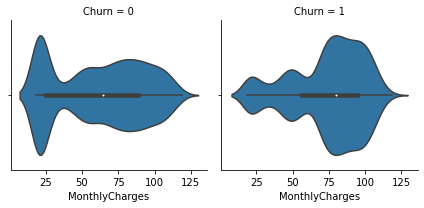

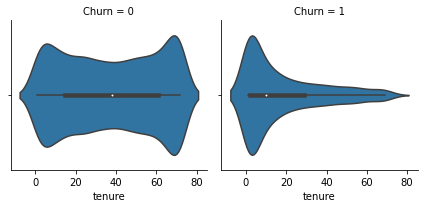

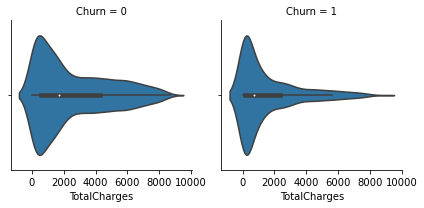

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# task 8.1
columnsToPlot = ["MonthlyCharges", "tenure", "TotalCharges"]
for columnToPlot in columnsToPlot:
    sns.FacetGrid(data, col="Churn").map(sns.violinplot, columnToPlot)

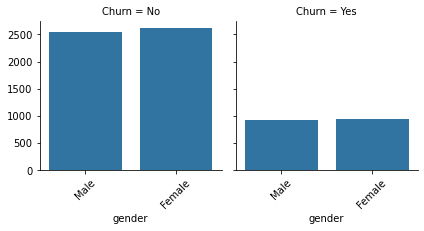

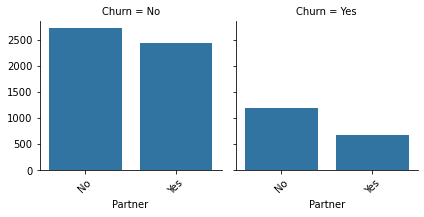

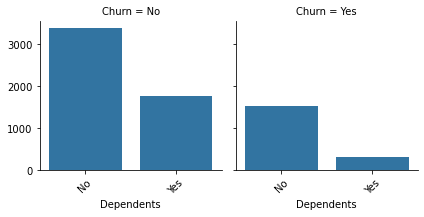

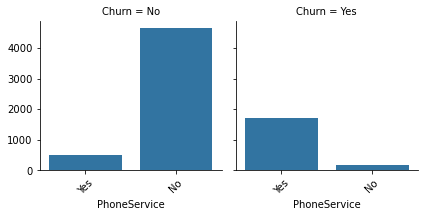

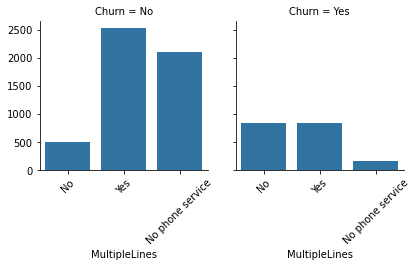

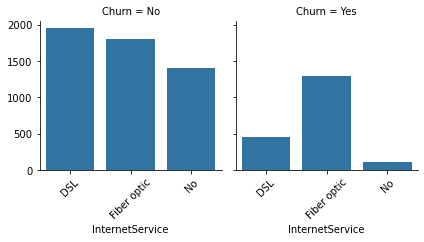

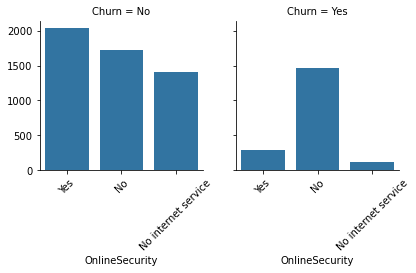

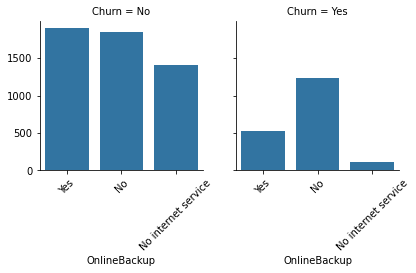

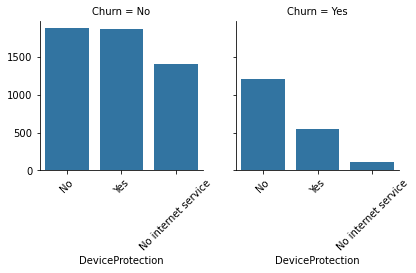

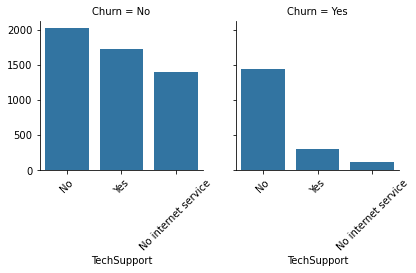

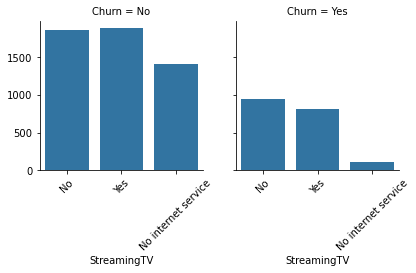

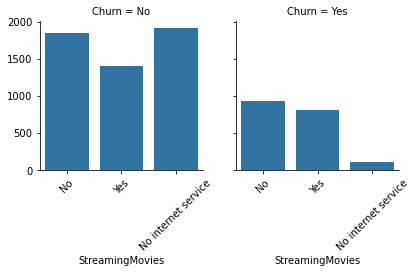

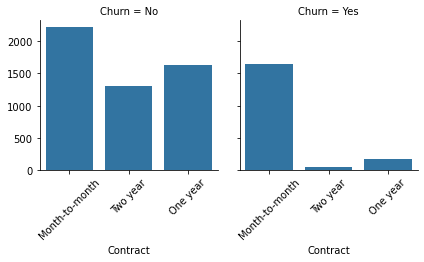

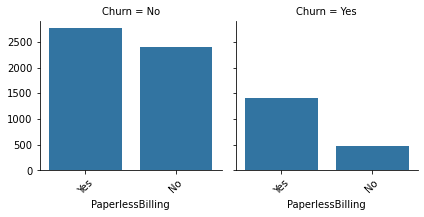

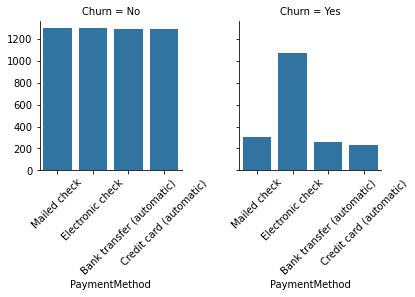

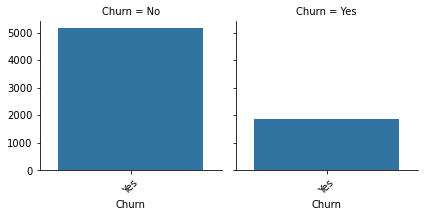

In [10]:
#task 8.2
for nonNumericColumn in nonNumericColumns:
    g = sns.FacetGrid(dataNonNumeric, col="Churn")
    g.map(sns.countplot, nonNumericColumn)
    g.set_xticklabels(rotation=45) 


#differrenes of distribtutions:
#-Phone Service:    -> no phone Service -> more likey to churn
#-Mutluiple Lines   -> yes --> more likley not to churn 
#-Internet Service  -> 
#-Online Backup
#-Online Security
#-TechSupport
#-StreamingMovies
#-Contract
#-Payment method

    

When looking at these diagrams, it should be noted that they indicate absolute numbers. Generally, there are only a few in the category Churn = yes.

Characteristics without a noticeable influence are:
1. gender
1. partner
1. dependents
1. streaming TV
1. paperless billing

Characteristics with influence are:
- Phone Service (customers who received no phone service seem more likely not to churn)
- Multiple Lines
- Internet Service
- Online Security
- Online Backup
- Tech Support
- Streaming Movies
- Contract
- Payment Method

It is expected that these features are informative in terms of classification, as they are likely to influence customers in terms of churn.

#### Task 9: Understand data by correlation-analysis
Use the pandas-dataframe method `corr()` for calculating the pairwise correlations of all columns. Visualize the calculated pairwise correlations by applying seaborn's `heatmap()`.

<AxesSubplot:>

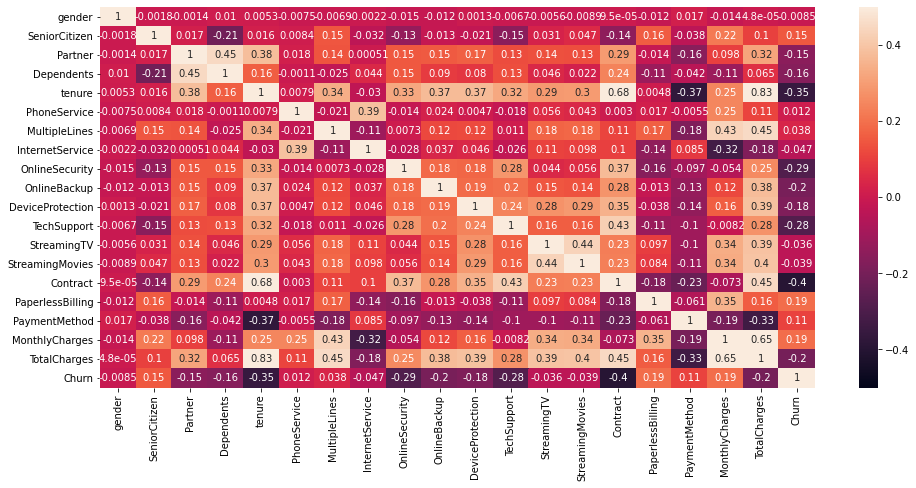

In [11]:
correlatedData = data.corr()
plt.subplots(figsize=(16,7))
sns.heatmap(correlatedData, annot=True ,vmin =-0.5, vmax=0.5)

##### How to interpret the heatmap?
* The correlation of the features among each other is shown in the heatmap with different brightness values.
* The brighter a cell of the heatmap, the higher the positive correlation of the respective features.
* The darker a cell of the heatmap, the higher the negative correlation of the respective features.
* The white diagonal of the heatmap results from the correlation of a feature with itself. In this case, the correlation is maximum.

##### Interpretation of the heatmap:
* The heatmap is searched for the lightest and darkest cells to find suitable features for classification. 
* The heatmap shows that the features "tenure", "OnlineSecurity", TechSupport and "Contract" have the greatest influence on "Churn".

### Task 10: Univariate Feature Selection
Goal of univariate feature selection is to select a set of most informative features, based on univariate statistical tests. In scikit-learn the following tests are available:
* **Regression:** [Mutual Information for Regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression), [f-measure for regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)
* **Classification:** [Mutual Information for Classification](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif), [$\chi^2$-test](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [f-measure for classification](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif).

For unsupervised learning for example the [sklearn.feature_selection.VarianceThreshold class](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) can be applied. This method just analysis the variance of a single feature and does not require a class-label or regression target-value.

**Subtasks:**
* Calculate feature importance of all features in the churn-prediction data w.r.t. to all 3 feature importance tests for classification. Display the results in a single dataframe, whose rows are the features and whose columns are the distinct feature-importance-tests. For $\chi^2$ and F-measure the value of the test and it's p-value shall be contained in this dataframe. 
* Discuss the result.
* Apply scikit-learn's method `selectKBest()` for extracting the $k=8$ most relevant features with respect to *mutual information*

In [12]:
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif,SelectKBest

labels = data["Churn"]
features = data.drop(columns="Churn")

_mutual = mutual_info_classif(features,labels)
_chi2= chi2(features,labels)[0]
_chi2_p= chi2(features,labels)[1]
_f_classif = f_classif(features,labels)[0]
_f_classif_p = f_classif(features,labels)[1]

importance = pd.DataFrame()
importance["Mutual Information for Classification"] = _mutual
importance["χ2 -test"] = _chi2
importance["χ2 -test P-Value"] = _chi2_p
importance["f-measure for classification"] = _f_classif
importance["f-measure for classification P-Value"] = _f_classif_p
importance.index=features.columns
# display values with lower precision and highlighted maximum
display(importance.style.highlight_max(subset=importance.columns))






,Mutual Information for Classification,χ2 -test,χ2 -test P-Value,f-measure for classification,f-measure for classification P-Value
gender,0.000000,0.254297,0.614066,0.513304,0.473736
SeniorCitizen,0.004622,133.482766,0.000000,163.012426,0.000000
Partner,0.019130,81.857769,0.000000,161.775966,0.000000
Dependents,0.011090,131.271509,0.000000,192.188857,0.000000
tenure,0.070050,16377.328093,0.000000,1007.509431,0.000000
PhoneService,0.000435,0.092948,0.760462,0.961054,0.326955
MultipleLines,0.004687,9.735960,0.001807,10.189201,0.001419
InternetService,0.062387,9.715269,0.001827,15.628210,0.000078
OnlineSecurity,0.063041,550.437364,0.000000,640.904068,0.000000
OnlineBackup,0.052606,229.441123,0.000000,278.742773,0.000000


##### Discussion of the results
* Expectation: The features "tenure", "OnlineSecurity", TechSupport and "Contract" are most relevant for the prediction of "Churn".
* Result: The features "Contract", "tenure", "OnlineSecurity", "TechSupport" are most relevant for the prediction of "Churn" according to the Mutual Information for Classification Test. The other tests provide comparable results.
    * What does the Mutual Information for Classification Test mean? 
        Mutual Information measures how much information the presence/absence of a term contributes to making the correct classification.

#### Interpretation of the P-Values
* The P-value of the Chi2-test and the f-measure for classification test are a measure for the dependency of the respective feature on "churn". The smaller the P-value, the greater the probability that the corresponding feature depends on "churn".
* Phone Service" and "Gender" have very high P-values in both the Chi2 and f-measure for classification tests. Moreover, according to the Mutual Information for Classification Test, they are 0, so they are not relevant. These two features therefore have no influence on the classification of "Churn".

In [13]:
#get best features
selector = SelectKBest(mutual_info_classif, k=8)
selector.fit_transform(features, labels)
#get feature names
best_feature_names=[]
mask = selector.get_support()
for bool, feature in zip(mask, data.columns):
    if bool:
        best_feature_names.append(feature)
print(best_feature_names)

['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod']


### Task 11: Transform Data: One-Hot Encoding
The following picture displays the different data types:
![data types](./dataTypes.png)


Non-binary nominal data should be one-hot encoded. Determine all columns with non-binary nominal data and transform the feature-array of the churnPrediction-dataframe (with all features) into a version, in which non-binary nominal features are one-hot encoded. 

In [14]:
# Encode all non-binary nominal data of the type object
print("datashape:", data.shape)
encodeColumns = []
for col in data:
    if(dataNonNumeric.dtypes[col] == 'object'):
        if data[col].unique().size > 2:
            encodeColumns.append(col)
encodedData = pd.get_dummies(data, columns=encodeColumns)
print("number of encoded columns: ", len(encodeColumns))
print(encodedData.shape)
display(encodedData.head(5))        


datashape: (7032, 20)
number of encoded columns:  10
(7032, 41)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


* number of encoded columns:  10
* 9 columns have 3 unique values
* 1 column has 4 unquie values
* originally 20 columns

* --> Columns after one-hot-encoding 20 -10 + 3 * 9+ 1 * 4 = 41 



### Task 12: Transform data: Scaling
Except decision trees and ensemble methods, which contain decision trees, nearly all machine learning algorithms require features of similar scale at the input. Since the value ranges of practical data can be very different a corresponding scaling must be performed in the preprocessing chain. The most common scaling approaches are *normalization (MinMax-scaling)* and *standardization*.

**Normalization:** In order to normalize feature *x* it's minimum $x_{min}$ and maximum $x_{max}$ must be determined. Then the normalized values $x_n^{(i)}$ are calculated from the original values $x^{(i)}$ by  
$$x_n^{(i)}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}.$$
The range of normalized values is $[0,1]$. A problem of this type of scaling is that in the case of outliers the value range of non-outliers may be very small. 

**Standardization:** In order to standardize feature *x* it's mean value $\mu_x$ and standard deviation $\sigma_x$ must be determined. Then the standardized values $x_s^{(i)}$ are calculated from the original values $x^{(i)}$ by
$$x_s^{(i)}=\frac{x^{(i)}-\mu_x}{\sigma_x}$$
All standardized features have zero mean and a standard deviation of one.

Calculate 
* a normalized
* a standardized 

representation of the feature-array of the churn-prediction data (from the original data, without features-selection and one-hot encoding).

In [15]:
normalized_data=(data-data.min())/(data.max()-data.min())
print("normalized_data")
display(normalized_data.head(5))
standardized_data=(data-data.mean())/data.std(axis='rows')
print("standardized_data")
display(standardized_data.head(5))


normalized_data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867,0.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330,1.0


standardized_data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009358,-0.440296,1.035543,-0.652259,-1.280157,-3.056117,0.062662,-1.183530,-0.917772,1.242786,-1.026915,-0.924201,-1.112553,-1.121422,-0.826676,0.828880,0.399777,-1.161611,-0.994123,-0.601621
1,0.990588,-0.440296,-0.965539,-0.652259,0.064298,0.327166,-0.991493,-1.183530,1.407912,-1.028925,1.245352,-0.924201,-1.112553,-1.121422,0.373899,-1.206275,1.336541,-0.260859,-0.173727,-0.601621
2,0.990588,-0.440296,-0.965539,-0.652259,-1.239416,0.327166,-0.991493,-1.183530,1.407912,1.242786,-1.026915,-0.924201,-1.112553,-1.121422,-0.826676,0.828880,1.336541,-0.363897,-0.959581,1.661941
3,0.990588,-0.440296,-0.965539,-0.652259,0.512450,-3.056117,0.062662,-1.183530,1.407912,-1.028925,1.245352,1.396864,-1.112553,-1.121422,0.373899,-1.206275,-1.473752,-0.747797,-0.195234,-0.601621
4,-1.009358,-0.440296,-0.965539,-0.652259,-1.239416,0.327166,-0.991493,0.172823,-0.917772,-1.028925,-1.026915,-0.924201,-1.112553,-1.121422,-0.826676,0.828880,0.399777,0.196164,-0.940391,1.661941


### Task 13: Definition and Evaluation of multiple data mining processing chains 
The entire Data Mining process usually comprises a sequence of modules, e.g: 

*data access -> cleaning -> feature selection -> transformations -> modelling -> visualisation -> evaluation*

In scikit-learn such sequences of modules can comfortably be encapsulated within a single [Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline). As shown in the code-snippet below, a Pipeline-object can be configured as a sequence of other scikit-learn objects. The restriction is that all but the last module in a pipeline must be of **Transformer**-type. All *Transformers* have a `fit()` module for training and a `transform()`-method to transform data. The last module in the sequence is an **Estimator**-type. All *Estimators* have a `fit()`-method for training and a `predict()`-method to estimate an output for the given input data. The main benefits of the `Pipeline`-class are:

* For training the `fit()`-method must be envoked only once to fit a whole sequence of modules in the pipeline.
* After training the `predict()`-method must also be envoked only once per pipeline.
* Parameter optimisation, e.g. by Grid-Search can be performed over all parameters in the pipeline. 

Define multiple pipelines:
* All of them shall apply [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for classification. However, different pipes can be defined for different parameter settings of this classifier. In particular the parameter `class_weight` shall be varied. Describe the meaning of this parameter.
* Define pipes with and without normalization and scaling
* Define pipes with and without one-hot encoding
* Define pipes with and without feature-selection (`selectKBest`)

All of the pipes shall be trained with training data, which shall compris 70 percent of the entire data. The remaining 30% shall be applied for test. For all of the pipes
* the confusion matrix
* accuracy
* precision
* recall
* f1-measure

shall be determined. Display all results concisely. Which configuration yields the best result? 


In [16]:
display(data.head(5))


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [20]:
from sklearn import pipeline
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import feature_selection

### prepare data 
labels = data.Churn
features = data.drop('Churn', axis=1)
# separate data using scikit learn (70% train, 30% test)
featuresTrain, featuresTest, labelsTrain, labelsTest = model_selection.train_test_split( features, labels, test_size=0.3, random_state=42)

## Check data balance
sum0 = labels.tolist().count(0)
sum1 = labels.tolist().count(1)
ratio = sum0/sum1
print('Sum of label "0": '+str(sum0))
print('Sum of label "1": '+str(sum1))
print('Ratio 0/1: '+str(ratio))

### determine:
##  confusion matrix, accuracy, precision, recall, f1-measure
def getResults(labelsTest, prediction):
    #  Confusion matrix
    tn, fp, fn, tp = metrics.confusion_matrix(y_true=labelsTest, y_pred=prediction).ravel()
    #print("True negatives: "+str(tn)+"\nTrue positives: "+str(tp)+"\nFalse positives: "+str(fp)+"\nFalse negatives: "+str(fn))
    # accuracy
    accuracy = metrics.accuracy_score(y_true=labelsTest, y_pred=prediction)
    #print("Accuracy: "+str(accuracy))
    # precision
    precision = metrics.precision_score(y_true=labelsTest, y_pred=prediction)
    #print("Precision: "+str(precision))
    # recall
    recall = metrics.recall_score(y_true=labelsTest, y_pred=prediction)
    #print("Recall: "+str(recall))
    # f1-measure
    f1 = metrics.f1_score(y_true=labelsTest, y_pred=prediction)
    #print("F1-Score: "+str(f1))
    return([accuracy, precision, recall, f1, tn, fp, fn, tp])

### Apply pipelines:
##  logisticRegression, class_weight (variation)
##  MinMax scaler / Standard scaler / No scaling
##  One-Hot encoding / No encoding
##  Feature selection (selectKBest) / No feature selection
# classWeight penalizes mistakes with classWeight instead of 1. Thus higher class-weight means more emphasis on a class.
classWeightConfig = ['none', {0:0.1}, {0:0.2}, {0:0.3}, {0:0.4}, {0:0.5}, {0:0.6}, {0:0.7}, {0:0.8}, {0:0.9}]
scalerConfig = [preprocessing.MinMaxScaler(), preprocessing.StandardScaler(), 'none']
encodingConfig = [preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore'), 'none']
featureSelectionConfig = [feature_selection.SelectKBest(feature_selection.mutual_info_classif, k=8), 'none']

variantData = []
for classWeight in classWeightConfig:
    print("processing classWeight: ", classWeight)
    for scaler in scalerConfig:
        for encoding in encodingConfig:
            for featureSelection in featureSelectionConfig:
                pipelineSteps = list()
                # Only append scikit-learn objects to pipeline!
                if featureSelection != 'none':
                    pipelineSteps.append(featureSelection)
                if encoding != 'none':
                    pipelineSteps.append(encoding)
                if scaler != 'none':
                    pipelineSteps.append(scaler)
                # Append classifier with configured class weights
                if classWeight != 'none':
                    pipelineSteps.append(linear_model.LogisticRegression(class_weight=classWeight))
                else:
                    pipelineSteps.append(linear_model.LogisticRegression())
                # create pipeline
                pipelineVariant = pipeline.make_pipeline(*pipelineSteps)
                # train
                pipelineVariant.fit(featuresTrain, labelsTrain)
                # predict
                prediction = pipelineVariant.predict(featuresTest)
                # Evaluate result
                result = getResults(labelsTest, prediction)
                result.insert(0, str(classWeight))
                result.insert(0, str(featureSelection).split("(")[0])
                result.insert(0, str(encoding).split("(")[0])
                result.insert(0, str(scaler).split("(")[0])
                variantData.append(result)
# display comparison results of all pipeline variants with highlighted maximum/minimum
comparison = pd.DataFrame(data=variantData, columns=['scaler', 'encoding', 'featureSelection', 'classWeight', 'accuracy', 'precision', 'recall', 'f1', 'tn', 'fp', 'fn', 'tp'])
display(comparison.style.highlight_max(subset=['accuracy', 'precision', 'recall', 'f1', 'tn', 'tp']).highlight_min(subset=['fp', 'fn']))
    

Sum of label "0": 5163
Sum of label "1": 1869
Ratio 0/1: 2.7624398073836276
processing classWeight:  none
processing classWeight:  {0: 0.1}
processing classWeight:  {0: 0.2}
processing classWeight:  {0: 0.3}
processing classWeight:  {0: 0.4}
processing classWeight:  {0: 0.5}
processing classWeight:  {0: 0.6}
processing classWeight:  {0: 0.7}
processing classWeight:  {0: 0.8}
processing classWeight:  {0: 0.9}


,scaler,encoding,featureSelection,classWeight,accuracy,precision,recall,f1,tn,fp,fn,tp
0,MinMaxScaler,OneHotEncoder,SelectKBest,none,0.776303,0.591376,0.513369,0.549618,1350,199,273,288
1,MinMaxScaler,OneHotEncoder,none,none,0.791469,0.628450,0.527629,0.573643,1374,175,265,296
2,MinMaxScaler,none,SelectKBest,none,0.784834,0.617582,0.500891,0.553150,1375,174,280,281
3,MinMaxScaler,none,none,none,0.796209,0.642702,0.525847,0.578431,1385,164,266,295
4,StandardScaler,OneHotEncoder,SelectKBest,none,0.733649,0.499096,0.491979,0.495512,1272,277,285,276
5,StandardScaler,OneHotEncoder,none,none,0.755924,0.546371,0.483066,0.512772,1324,225,290,271
6,StandardScaler,none,SelectKBest,none,0.783886,0.614880,0.500891,0.552063,1373,176,280,281
7,StandardScaler,none,none,none,0.799052,0.647312,0.536542,0.586745,1385,164,260,301
8,none,OneHotEncoder,SelectKBest,none,0.781043,0.602484,0.518717,0.557471,1357,192,270,291
9,none,OneHotEncoder,none,none,0.791469,0.628450,0.527629,0.573643,1374,175,265,296


Since unbalanced data with 1869 True to 5163 false labels was used, Accuracy cannot be used as the primary test score for selecting the best pipeline. The f1 score is better suited as a basis for decision making because it takes into account the uneven distribution of labels.

Proportion Label_0 = (1 - (NumberFalseLabels /TotalNumberLabels) =1869 / (5163 + 1869) = 0.734

#### Expectations: 
* Accuracy should be greater than 73%, since a classifier that would always predict Label0 would achieve an Accuary of 73.4%.
* FeatureSelection does not give a better result, because information is lost.

#### Result:
* The highest f1 score of 0.63 was achieved with MinMaxScaler, without OneHotEncoding and without Feature Selection.
* Accuracy of 78% is greater than 73%, as expected.
* As expected, the best f1 score was achieved without feature selection.